## Content

  - **Batch Gradient**

  - **SGD/MiniBatch**
    - Understanding Mini-Batch GD


  - **MiniBatch Code- PostRead**

  - **Polynomial Regression**

  - **Polynomial Regression Code**

  - **Underfit Overfit Tradeoff**
    - Geometric Intuition
    - Mathematical Intuition
   
    - Relating with Bias Variance
   - **Underfit Overfit Code**


  - **Generalization and Occam's Razor**
  
  - **Generalization and Occam's Razor Code**


#**Batch Gradient**




## **Lets see if you remember GD properly**

#### How did we compute gradient descent in Linear Regression ?



Recall when computing the gradient descent, the weights are updated as:


<center><img src='https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/061/771/original/z.png?1705227694' width=800></center>



#### What can be the potential problem while doing Gradient Descent ?





<center><img src='https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/061/772/original/z.png?1705227727' width=800></center>

<center><img src='https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/061/773/original/z.png?1705227759' width=800></center>

##**SGD/Mini Batch**##


#### How to reduce the time taken by Batch Gradient ?







<center><img src='https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/061/774/original/z.png?1705227917' width=800></center>


#### What can be the possible values of Batch size ($k$) ?











<center><img src='https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/061/775/original/z.png?1705227945' width=800></center>

## **Understanding Mini-Batch GD**

<center><img src='https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/061/776/original/z.png?1705227978' width=800></center>




<center><img src='https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/061/778/original/z.png?1705228014' width=800></center>







<center><img src='https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/061/779/original/z.png?1705228042' width=800></center>


#### Will the gradient value be accurate for mini batch with k = 256 ?

<center><img src='https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/061/780/original/z.png?1705228074' width=800></center>




<center><img src='https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/061/781/original/z.png?1705228104' width=800></center>



#### How is Mini-Batch effective over Batch Gradient ? (optional)







<center><img src='https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/061/782/original/z.png?1705228154' width=800></center>

**Observe:**
We already have seen in Gradient Descent that:
- **Vectorization is computed faster than iterating over n samples**

- **Hence, Mini-Batch GD is just a vectorization of Batch Gradient**
 - As we divide the data into chunks in order to quickly find gradients


#### How is Gradient Descent step progress in Mini-Batch, SGD and Batch GD ?



Lets understand the fluctuations in weight values with a contour plot of loss:

<center><img src='https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/061/783/original/z.png?1705228191' width=800></center>


<center><img src='https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/061/784/original/z.png?1705228228' width=800></center>



**Observe**

1. For **Batch Gradient descent**,
- Since the entire data is taken for gradients,
    - the weight reaches optimal value with **least number of fluctuations per iteration**

- But due to taking **whole data per iteration**, the time to compute one GD step/iteration  is very high

<br>

2. For **Stochastic GD**,
- Since only a single datapoint is used for  gradients, and these datapoints can be noises in the data
- Hence, there  will be **the maximum number of fluctuations in the weight value**



<br>

3. Now when **Mini-Batch GD** is used:
-  Since it vectorizes the data into chunks, **Mini-Batch GD reaches optimal weight value the fastest**
- With a cose of **few fluctuations in the weight value**









## **Mini-Batch Gradient code** - (Post Read)

PostRead- Link: https://colab.research.google.com/drive/1EXhY2Ax1lPp7cc03bHvwtc-UQ78t6iKI?usp=sharing

#**Polynomial Regression**

Lets consider another dummy data

- Here, we have 50 datapoints
- But now the data is non-linear in nature

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


np.random.seed(1)
X = np.random.rand(50,1)
y = 0.7*(X**5) - \
    2.1*(X**4) + \
    2.7*(X**3) + \
    3.5*(X**2) + \
    0.3* X + \
    0.4*np.random.rand(50,1) # no data in world is perfect

0.9345996128366808


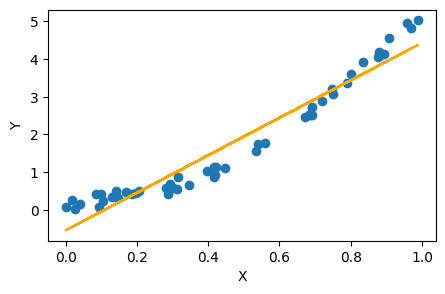

In [ ]:

from sklearn.linear_model import LinearRegression



model = LinearRegression()
model.fit(X, y)

output = model.predict(X)

print(model.score(X,y))

fig = plt.figure(figsize=(5,3))
plt.scatter(X, y, label="samples")
plt.plot(X, output, label="prediction",color='orange')
plt.xlabel("X")
plt.ylabel("Y")
plt.show()



**observe**

As Linear Regression did not fit the data well

- Concluding that **Linear Regression is not the most suitable model to be used**

## **Explaining Polynomial Regression theoretically**

#### How to make Linear Regression,  Quadratic ?

By adding a new feature $f_2 = f_1^2$, such that:

- $\hat{y^{(i)}} = w_0 + w_1 f_1 + w_2 {f_1}^2$

**Note:** Due to addition of a higher degree($>1$) for a feature,
- we call this model as **Polynomial Regression**


<br>

#### Do we need a separate implementation for Polynomial Regression?

Ans: No, we just need to add a new data column $f_2 = f_1^2$

<center><img src='https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/061/788/original/z.png?1705228371' width=800></center>

**observe**

For the Polynomial Regression equation $\hat{y^{(i)}} = w_0 + w_1f_1 + w_2 f_1^2$
- it is still a linear combination of weights since the degree of weights are 1

<br>

**Concluding** that if we were to **plot the learnt hyperplane** of Polynomial Regression for $f_1$ and $f_2=f_1^2$
- The hyperplane **will be linear**

#### Does using $f_2 = {f_1}^2$ causes MultiCollinearity ?




<center><img src='https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/061/790/original/z.png?1705228432' width=800></center>

# **Polynomial Regression Code**



 Creating polynomial reg with $X^2$ feature added


In [ ]:
def adj_r(r_sq,X,Y):
  adj_r1 = (1 - ((1-r_sq)*(len(Y)-1))/(len(Y)-X.shape[1]-1) )
  return adj_r1

In [ ]:
def r2_score(y,y_):
    num = np.sum((y-y_)**2)
    denom = np.sum((y- y.mean())**2)
    score = (1- num/denom)
    return score

Adj. R-square: 0.9947910474710182


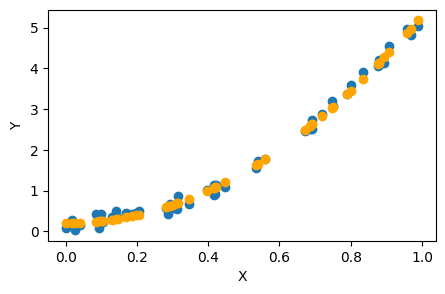

In [ ]:
#adding new feature X^2
X_deg2 = np.hstack([X, X**2])
model_deg2 = LinearRegression()
model_deg2.fit(X_deg2, y)
output = model_deg2.predict(X_deg2)


print('Adj. R-square:', adj_r(r2_score(y,output),X,y ) )
fig = plt.figure(figsize=(5,3))
plt.scatter(X, y, label="samples")
plt.scatter(X, output, label="prediction",color='orange')
plt.xlabel("X")
plt.ylabel("Y")
plt.show()


**observe**
- The performance of the model increased drastically
- Meaning that a non-linear feature did the trick





#### But are we sure that degree=2 will be best? What about higher degrees?

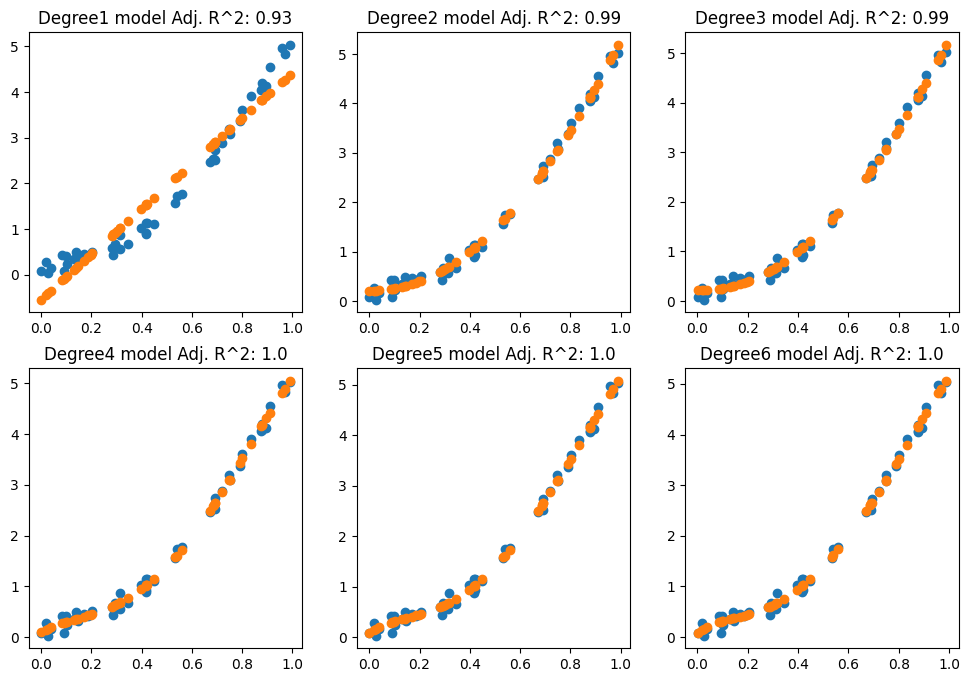

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

scores = []
# Using Degrees 1 to 6, and seeing performance of the model

# Create a 2x3 grid of subplots
fig, axes = plt.subplots(2, 3, figsize=(12, 8))
j = 0
for i in range(1, 7):

    #creates polynomial feature
    poly = PolynomialFeatures(i)

    X_poly = poly.fit_transform(X)
    #Standardization
    scaler = StandardScaler()
    scaler.fit(X_poly)
    X_poly_scaled = scaler.transform(X_poly)

    #training model
    model = LinearRegression()
    model.fit(X_poly_scaled, y)

    #Prediction
    output = model.predict(X_poly_scaled)

    #Plotting

    axes[j,(i-1)%3].scatter(X, y, label="samples")
    axes[j,(i-1)%3].scatter(X, output, label="prediction")
    axes[j,(i-1)%3].set_title(f'Degree{i} model Adj. R^2: {round(adj_r(r2_score(y,output),X_poly_scaled,y ),2)}')

    if(i==3):
      j=1

**Observe**:
- As the degree of the feature being added increases, the model performance gets better

<br>







# **Underfitting and Overfitting**

## **Overfitting**

#### Which model has the highest Adj R-squared ?

Ans: Clearly, we see that Polynomial regression with degrees:
- Degree 2,3,4,5,6 all have the highest Adj. R-squared value

**This should mean**
-  polynomial Regression with degree of 20, 40 should also perform well

#### What could be the potential problem with very high degree models ?

Ans: high degree models become  very complex:
- is that they may **learn noise besides meaningful patterns**

<br>

#### Do you remember what matters in ML the most ?
Ans: The ML model must generalise the data, but for Higher degree polynomial

- the model may learn every pattern in training data (including noise) which will improve training performance

<center><img src='https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/061/806/original/z.png?1705228921' width=800></center>

- But this learning may impact general training
- and  cause the model to not perform well on testing data

**Note:** This is called as **Overfitting** --> typically when **training performance is really good but testing performance is bad.**

## **underfitting**

Recall the case of **applying degree=1 on our data**,
- model isnt even capable of learning the meaningful patterns
- Forget performing good on testing data

<center><img src='https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/061/805/original/z.png?1705228886' width=800></center>



this low complexity model may not even be able to learn the patterns of training data

<br>

**Note:** This is called as **Underfitting** --> typically when **both training and testing performance is bad**

## Summary:

<center><img src='https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/061/808/original/z.png?1705228974' width=800></center>


# **Occam's Razor**


#### Why do we pefer model with Degree=2 ?


<center><img src='https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/061/810/original/z.png?1705229028' width=800></center>

Ans: Due to a **principle in Psychology called Occum's Razor** which says -

- **choose simplicity**,, hence we will hence choose degree=2

## **Underfitting Overfitting Code**

Lets perform the implementation for Linear Regression
- With degree $\in [1,34]$ , and plot the train and test performance

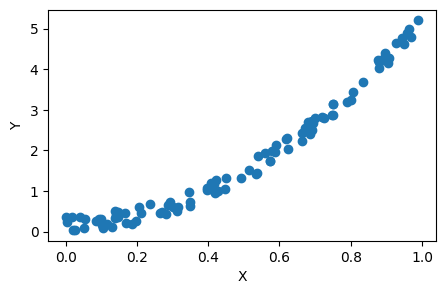

In [ ]:
# lets first generate a dataset of 100 points this time
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(1)
X = np.random.rand(100,1)
y = 0.7*(X**5) - \
    2.1*(X**4) + \
    2.7*(X**3) + \
    3.5*(X**2) + \
    0.3* X + \
    0.4*np.random.rand(100,1)

fig = plt.figure(figsize=(5,3))
plt.scatter(X, y)
plt.xlabel("X")
plt.ylabel("Y")
plt.show()


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [ ]:
def adj_r(r_sq,X,Y):
  adj_r1 = (1 - ((1-r_sq)*(len(Y)-1))/(len(Y)-X.shape[1]-1) )
  return adj_r1

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error

degrees = 100 # number of data-points
train_scores = []
test_scores = []

train_loss = []
test_loss = []

scaler = StandardScaler()

for degree in range(1, degrees):

    polyreg_scaled = make_pipeline(PolynomialFeatures(degree), scaler, LinearRegression())
    polyreg_scaled.fit(X_train, y_train)

    train_score = polyreg_scaled.score(X_train, y_train)
    test_score = polyreg_scaled.score(X_test, y_test)

    train_scores.append(adj_r(train_score,X_train,y_train))
    test_scores.append(adj_r(test_score,X_test,y_test))

    output1 = polyreg_scaled.predict(X_train)
    output2 = polyreg_scaled.predict(X_test)

    train_loss.append(mean_squared_error(y_train,output1))
    test_loss.append(mean_squared_error(y_test,output2))


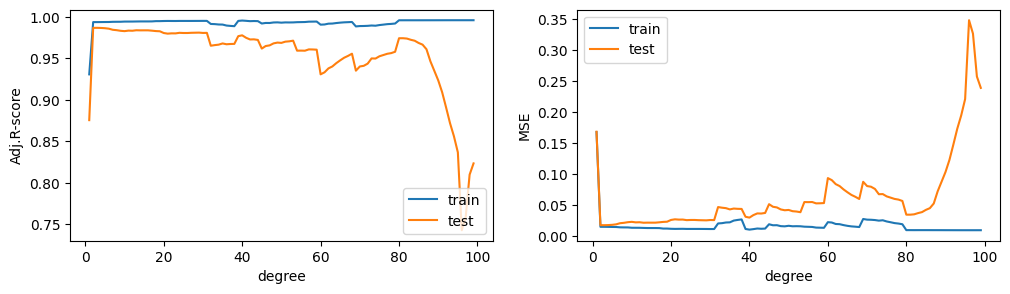

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 3))
axes[0].plot(list(range(1, 100)), train_scores, label="train")
axes[0].plot(list(range(1, 100)), test_scores, label="test")
axes[0].legend(loc='lower right')
axes[0].set_xlabel("degree")
axes[0].set_ylabel("Adj.R-score")

axes[1].plot(list(range(1, 100)), train_loss, label="train")
axes[1].plot(list(range(1, 100)), test_loss, label="test")
axes[1].legend(loc='upper left')
axes[1].set_xlabel("degree")
axes[1].set_ylabel("MSE")

plt.show()

**observe**

As we go in higher Degree, the model test performance drop significantly
- Which clearly indicates Overfitting

While in the lower Degree, the model test and train perfromance is very low
- Which shows Underfitting

# **Bias-Variance Tradeoff**

<center><img src='https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/061/818/original/z.png?1705229323' width=800></center>



<center><img src='https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/061/819/original/z.png?1705229348' width=800></center>



<center><img src='https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/061/820/original/z.png?1705229380' width=800></center>



<center><img src='https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/061/821/original/z.png?1705229408' width=800></center>



<center><img src='https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/061/822/original/z.png?1705229434' width=800></center>

#### So, ideally what should the model have ?

Ans: **low bias and low variance**


<center><img src='https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/043/111/original/Screenshot_2023-08-16_at_6.40.16_PM.png?1692191426' width=800></center>

As the model is hitting mostly on our target (bullseye)
- We say, the model has low bias

And since model is having a steady aim (consistent in its predictions for aiming)
- We say, the model has low variance  

## **Relating Bias-Variance and Overfit-Underfit**

#### What do you think will bias and variance for under-fitted model?Will the predictions be mostly off/bad?

Ans: Yes, because model **unable to understand the patterns --> HIGH BIAS**


<br>


#### Will the predictions vary a lot with a slight change in the feature values of the samples ?

Ans:  NO, **its a simple model --> LOW VARIANCE**

<center><img src='https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/061/823/original/z.png?1705229483' width=800></center>

#### What do you think about the  bias and variance for over-fitted model? Will the predictions be mostly off/bad?

Ans: **Not always, it will be bad for the cases which are different from training samples** --> **LOW BIAS**

<br>

#### Will the predictions vary a lot with a slight change in the feature values of the samples ?

Ans: YES, since **the model hypothesis is very complex --> HIGH VARIANCE**

